In [2]:
# importing required tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [3]:
# dataset taken from https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [13]:
y = df['target'].values
y[0:5]

array([1, 1, 1, 1, 1])

Normalizing Data

In [14]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
knnclassifier = KNeighborsClassifier(n_neighbors = 4)
knnclassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [18]:
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [20]:
y_predicted = knnclassifier.predict(X_test)

In [28]:
from sklearn import metrics
print( str(metrics.accuracy_score(y_test, y_predicted) * 100)+ " % accuracy on test set")

82.89473684210526 % accuracy on test set


In [29]:
print(str(metrics.accuracy_score(y_train,knnclassifier.predict(X_train)) * 100) + "% accuracy on training dataset")

86.34361233480176% accuracy on training dataset


In [44]:
accuracyontrainset = [] 
accuracyontestset = []
n = 11
for i in range(1,n):
    classifier = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    accuracyontestset.append(metrics.accuracy_score(y_test, classifier.predict(X_test)))
    accuracyontrainset.append(metrics.accuracy_score(y_train, classifier.predict(X_train)))

    

In [45]:
accuracyontestset = np.array(accuracyontestset) * 100
accuracyontestset

array([80.26315789, 80.26315789, 86.84210526, 82.89473684, 82.89473684,
       82.89473684, 82.89473684, 84.21052632, 84.21052632, 85.52631579])

In [46]:
accuracyontrainset = np.array(accuracyontrainset) * 100

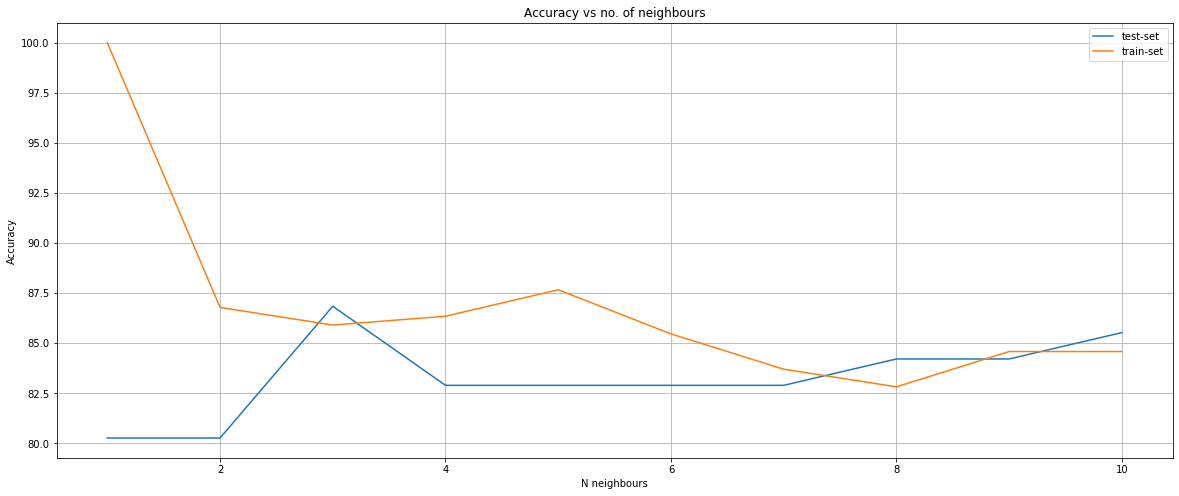

In [47]:
plt.figure(figsize=[20,8])
plt.plot(range(1,len(accuracyontestset)+1), accuracyontestset, label="test-set")
plt.plot(range(1,len(accuracyontrainset)+1), accuracyontrainset, label="train-set")
plt.legend()
plt.xlabel("N neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy vs no. of neighbours")
plt.grid()
plt.show()

In [48]:
print("Highest accuracy percentage on test set is ", accuracyontestset.max())

Highest accuracy percentage on test set is  86.8421052631579


In [51]:
print("No. of neighbours considered for highest accuracy is", accuracyontestset.argmax() + 1)

No. of neighbours considered for highest accuracy is 3
